# ECG Library

## Project structure

![project_structure](../docs/project_structure.png)

## Suggested pipeline

### Load ECG image

In [1]:
from PIL import Image

In [2]:
image = Image.open('../tests/test_data/ecg_image.jpg')

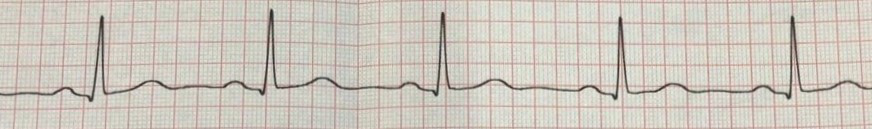

In [3]:
image

### Convert image to signal

In [4]:
import ECG.api as api

In [5]:
signal = api.convert_image_to_signal(image)

### Get signal of all 12 ECG leads
Recommended sampling rate is 500

In [6]:
import scipy.io

In [7]:
signal = scipy.io.loadmat('../tests/test_data/MI.mat')['ECG'][0][0][2]

In [8]:
assert len(signal.shape) == 2
assert signal.shape[0] == 12

In [9]:
sampling_rate = 500

### Check whether ST-elevation is present

In [10]:
api.check_ST_elevation(signal, sampling_rate=sampling_rate)

(<ElevatedST.Present: 'Significant ST elevation'>,
 'ST elevation value in lead V3 (0.225 mV) exceeded the threshold 0.2, therefore ST elevation was detected.')

### Evaluate risk markers

In [11]:
api.evaluate_risk_markers(signal, sampling_rate=sampling_rate)

RiskMarkers(Ste60_V3=0.225, QTc=501, RA_V4=0.315)

### Perform differential diagnosis

In [12]:
api.diagnose_with_STEMI(signal, sampling_rate=sampling_rate)

(<Diagnosis.MI: 'Myocardial Infarction'>,
 'Criterion value calculated as follows: (1.196 * [STE60 V3 in mm]) + (0.059 * [QTc in ms]) – (0.326 * [RA V4 in mm])) = 31.2231 exceeded the threshold 23.4, therefore the diagnosis is Myocardial Infarction')